# Cogs 108 Final Project - How has Gun Violence Affect the Polls

## Overview

Gun violence has become a very hot topic lately due to the mass shootings at schools, concerts, and even in our own neighborhoods. It has emboldened both sides of the political spectrum; driving many to the polls to vote their beliefs and demand changes to the system. Even though this issue is a very controversial topic, we can not deny how it has greatly polarized this nation and caused a great schism between conservatives and liberals, Democrats and Republicans. On that note, we wanted to tackle this trend and see how congressional districts have changed due to gun violence; ultimately visualizing who is the dominant party of the state over time.

### Group Members and Contributions
- Victor Chi(A14489640)
- Evan Kay (A12631982)
- Weilin Liu(A14713406)
- Christopher Rocha(A92080262)

## Part 1: Indroduction and Background

### Background

Gun violence is a booming topic that has caught our group's attention due to its significance in our daily lives. Just this year alone, there have been 147 mass shootings in the US, with 17 of those in California. This is especially important as the 2020 elections are right around the corner and politicians are using gun violence as leverage for their campaigns. With gun violence being a hot topic throughout the internet, there are dozens of articles that believe they have cracked the code for determining the connection between gun violence and voting habits. The issue with many of these articles are that they cannot all agree on a single verdict, and the correlation between the two remain a mystery.

[The Washington Post](https://www.washingtonpost.com/news/wonk/wp/2018/05/31/the-surprising-way-gun-violence-is-dividing-america/?noredirect=on&utm_term=.583b6e1bf7f8) looked into debunking the "public paradox" of gun control and political parties. It is generally assumed that Republican areas have more gun violence due to their views on bearing arms, but it is important to break down the statistics. Utilizing a similar data set, The Washington Post claims that there are 5.7 gun related deaths per 100,000 people per year in Republican counties, compared to 4.7 per 100,000 people in Democratic. This stat is a major misconception as it needs to be broken down into homocide related deaths and suicide related deaths. Republican counties' suicides outnumber homocide related deaths, while Democratic counties are the opposite. Further, Democratic counties have much higher populations (since they are large cities), which is naturally lower their death rates.

In general, gun violence is directly related to low-income and inequal areas, much of what associated with large cities. When these mass shootings occur in large cities, millions of people fear that it may affect them and vow to control guns. These lead to huge Democratic pushes towards gun control and fierce retaliation from Republicans fighting to their right to bear arms.

The overall increase in efforts by both the Democratic and Republican parties seem to have disrupted the previous norm, and we hope to uncover the true relationship between gun violence and congressional district voting. We will use data to guide us in a path that will triangulate the right conclusions and possibly see how a district will swing based on the increase or decrease of gun violence. 



### Research Question

Gun violence is a controversial topic that has impacted millions in our communities, so we will strictly focus on taking a data-based approach and utilizing big data to draw conclusions.

With that being said, we hope to predict and find indicators that determine how a state will vote, either Democratic or Republican, based on the amount number of gun violence incidents that has occured in that state during that year.

### Hypothesis

We believe that a decrease in gun violence will lead individual states to vote more Democratic.

Null Hypothesis: A decrease in gun violence will not effect in a state's voting.

Even though there is an increase in political activity due to gun violence, we believe that Republicans will have a stronger impact in swaying the state's vote due to two previous trends. First, there has been a significant increase in Republican voting activity when it comes to something that they strongly believe in, as can be seen in election race of 2016. Second, there has been a significant decrease in millenials voting. Note that milenials make up the majority of the population in large cities. These larger cities have a higher population density in comarison to the more sparsely populated Republican areas. As such, these milenial dominated cities would naturally have more gun violence but less of an impact on voter polls due to lack of milenial voting. There may be more factors that would sway the vote to be more Republican, but we believe that these two are dominating factors that drive our hypothesis.

### Datasets
Contains information about gun violence in each congressional district since 2012
- Dataset Name: Gun Violence Data
- Link to Dataset: https://www.kaggle.com/jameslko/gun-violence-data/home
- Number of observations: over 260k

Contains results of congressional voting data for each district
- Dataset Name: Congressional Voting Data
- Link to Dataset: http://library.cqpress.com/elections/download-data.php?filetype=&office=3&areatype=1&year=20122020&format=3&license=on&emailto=&emailfrom=
- Number of observations:  1600


## Dataset Cleaning

In [268]:
#Packages needed to clean the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle
#from datascience import *

### Cleaning Congressional Voting Data
The congressional voting data was a very difficult dataset to obtain due to the website's limitations. It only allowed the user to download a certain amount of states at a time, so as a result the states had to be downloaded in multiple files. To clean our data efficiently we will: 
- Read in all our datasets one by one as csv files.
- Concatenate them all together so cleaning the dataset as one will be much faster.
- Remove all columns except for the state, raceYear, and party winner.
- Remove NaN and other titles that were considered as rows, when the data sets were concatenated together.


In [269]:
# Reading in all voting records
states_1 = pd.read_csv("Alabama.csv",skiprows= 2)
states_2 = pd.read_csv('Alaska-Hawaii.csv', skiprows =2)
states_3 = pd.read_csv('Idaho-Massachusets.csv', skiprows = 2)
states_4 = pd.read_csv('Michigan to New Mexico.csv', skiprows = 2)
states_5 = pd.read_csv('New York-South Dakota.csv', skiprows = 2)
states_6 = pd.read_csv('Tennesee-Wyoming.csv', skiprows = 2)
states_1.head()

,Office,State,CensusPop,raceYear,Area,AreaNumber,RedistrictedDate,RepVotes,RepCandidate,RepStatus,...,ThirdVotes,ThirdCandidate,ThirdStatus,OtherVotes,PluralityVotes,PluralityParty,ThirdVotesTotalPercent,RepVotesMajorPercent,DemVotesMajorPercent,RaceNotes
0,House,Alabama,NaN,2018.0,District 1,1.0,20120101.0,"153,228","Byrne, Bradley",Incumbent,...,163,Write-In,Challenger,NaN,"64,002",R,0.07,63.20,36.80,NaN
1,House,Alabama,NaN,2016.0,District 1,1.0,20120101.0,"208,083","Byrne, Bradley",Incumbent,...,"7,810",Write-In,Challenger,NaN,"200,273",R,3.62,100.00,0.00,NaN
2,House,Alabama,NaN,2014.0,District 1,1.0,20120101.0,"103,758","Byrne, Bradley",Incumbent,...,198,Write-In,Challenger,NaN,"55,480",R,0.13,68.25,31.75,NaN
3,House,Alabama,NaN,2012.0,District 1,1.0,20120101.0,"196,374","Bonner, Josiah Robbins Jr.",Incumbent,...,"4,302",Scattered Write-In,Challenger,NaN,"192,072",R,2.14,100.00,0.00,NaN
4,House,Alabama,NaN,2018.0,District 2,2.0,20120101.0,"138,879","Roby, Martha",Incumbent,...,420,Write-In,Challenger,NaN,"51,948",R,0.19,61.50,38.50,NaN


In [270]:
# Concatenating all the states together
final_states = pd.concat([states_1, states_2,states_3,states_4,states_5,states_6])

In [271]:
# Cleaning dataset
pd.set_option('mode.chained_assignment', None)
congressional_data = final_states[['State','PluralityParty','raceYear']].dropna()
cleaned_congressional_data = congressional_data[congressional_data['State'] != 'State']
cleaned_congressional_data['raceYear'] = cleaned_congressional_data['raceYear'].astype(int)
cleaned_congressional_data.head()

,State,PluralityParty,raceYear
0,Alabama,R,2018
1,Alabama,R,2016
2,Alabama,R,2014
3,Alabama,R,2012
4,Alabama,R,2018


### Cleaning Gun Violence Data
The gun violence data set was already pretty clean since we obtained it from kaggle. However, it included a lot of information that we did not need to do our exploratory analysis. To clean our data we will:
- Read in our dataset
- Remove all columns except for the state and date
- Drop rows with NaN because they will not provide us with information we want

In [272]:
# Reading in Gun violence data
gun_data = pd.read_csv('gun-violence-data_01-2013_03-2018.csv')
# We will remove NaN because we will not know which congressional district the violence occurd
cleaned_gun_data = gun_data[['state','date','congressional_district']].dropna()
# Converting all the date to Years and dropping date
cleaned_gun_data['Date'] = pd.to_datetime(cleaned_gun_data['date'], errors='coerce')
cleaned_gun_data['Year'] = cleaned_gun_data['Date'].dt.year
cleaned_gun_data = cleaned_gun_data.drop(['date','Date','congressional_district'], axis = 1)
cleaned_gun_data.head()

,state,Year
0,Pennsylvania,2013
1,California,2013
2,Ohio,2013
3,Colorado,2013
4,North Carolina,2013


## Data Wrangling / Visualization
We will use a bar plot to visualize the dominance of each party per congressional cycle. There will also be a trend line visualizing the total amount of violence in that state per year.

#### Making Functions to clean our data and make new data tables 

In [273]:
# Function to find total amound of gun violence in a specific state per year
def total_violence(state):
    total = []
    for i in range(2013,2019, 2):
        year1 = cleaned_gun_data.loc[cleaned_gun_data['Year'] == i]
        year2 = cleaned_gun_data.loc[cleaned_gun_data['Year'] == i+1]
        count = len(year1.loc[year1['state'] == state]) + len(year2.loc[year2['state'] == state])
        total.append(count)
    return total

In [274]:
#Function to find percentage Republican per election cycle in each state.
def percent_rep(s):
    percentage_rep = []
    for i in range(2014, 2019, 2):
        target = cleaned_congressional_data[(cleaned_congressional_data['State'] == s) & (cleaned_congressional_data['raceYear'] == i)]
        rep = len(target.loc[target['PluralityParty'] == 'R'])
        dem = len(target.loc[target['PluralityParty'] == 'D'])
        total = rep + dem
        percentage_rep.append(rep/total)
    return percentage_rep

In [275]:
#Function to find percentage Democrat per each election cycle in each state.
def percent_dem(s):
    percentage_dem = []
    for i in range(2014, 2019, 2):
        target = cleaned_congressional_data[(cleaned_congressional_data['State'] == s) & (cleaned_congressional_data['raceYear'] == i)]
        rep = len(target.loc[target['PluralityParty'] == 'R'])
        dem = len(target.loc[target['PluralityParty'] == 'D'])
        total = rep + dem
        percentage_dem.append(dem/total)
    return percentage_dem

In [276]:
#Making new data table plotting total violence in years of congressional elections
list_of_state = cleaned_congressional_data['State'].unique().tolist()
total_violence_list = []
for state in list_of_state:
    total_violence_list.append(total_violence(state))
df_total_violence = pd.DataFrame(np.array(total_violence_list), index=list_of_state, columns=[2014, 2016, 2018])
df_total_violence.head()

,2014,2016,2018
Alabama,1317,2256,1644
Alaska,132,793,232
Arizona,561,1002,691
Arkansas,572,1201,950
California,3750,6732,5310


In [277]:
#Percent Republican in each state
percent_rep_list = []
for state in list_of_state:
    percent_rep_list.append(percent_rep(state))
df_percent_rep = pd.DataFrame(np.array(percent_rep_list), index=list_of_state, columns=[2014, 2016, 2018])
df_percent_rep.head()

,2014,2016,2018
Alabama,0.857143,0.857143,0.857143
Alaska,1.000000,1.000000,1.000000
Arizona,0.555556,0.555556,0.444444
Arkansas,1.000000,1.000000,1.000000
California,0.264151,0.269231,0.132075


In [278]:
#Percent Democrat in each state
percent_dem_list = []
for state in list_of_state:
    percent_dem_list.append(percent_dem(state))
df_percent_dem = pd.DataFrame(np.array(percent_dem_list),index = list_of_state, columns = [2014, 2016, 2018])
df_percent_dem.head()

,2014,2016,2018
Alabama,0.142857,0.142857,0.142857
Alaska,0.000000,0.000000,0.000000
Arizona,0.444444,0.444444,0.555556
Arkansas,0.000000,0.000000,0.000000
California,0.735849,0.730769,0.867925


## Final Data Table of all our datasets put into one

In [279]:
states = pd.Series(list_of_state)
#Extract each value that is in the nested list for Democrats and Republicans
dem_list = []
for i in percent_dem_list:
    for j in i:
        dem_list.append(j)
rep_list = []
for i in percent_rep_list:
    for j in i:
        rep_list.append(j)
#Exract total violence for that specific state for that specific year
violence = []
for i in total_violence_list:
    for j in i:
        violence.append(j)
#Telling python to cycle through 2014,2016,2018 to align with states
data = {'PropR':rep_list, 'PropD':dem_list, 'Violence': violence, 'State': states.repeat(3)}
final_table = pd.DataFrame(data)
years = cycle(['2014','2016','2018'])
final_table['Year'] = [next(years) for year in range(len(final_table))]
final_table = final_table.set_index('Year')
final_table.head()

,PropR,PropD,Violence,State
Year,,,,
2014,0.857143,0.142857,1317,Alabama
2016,0.857143,0.142857,2256,Alabama
2018,0.857143,0.142857,1644,Alabama
2014,1.000000,0.000000,132,Alaska
2016,1.000000,0.000000,793,Alaska


## Visualization of Data
We have that our data is mirrored, meaning that the proportions added up to one. Hence, we decided to choose Democrats in order to see if our hypothesis is correct or not.

### Democrats  2014 

Text(0, 0.5, 'Proportion of Democrats (0-1)')

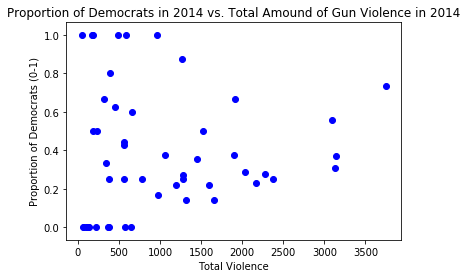

In [280]:
x = df_total_violence[2014].tolist()
y = df_percent_dem[2014].tolist()
plt.scatter(x, y, label="2014", color="blue")
plt.title('Proportion of Democrats in 2014 vs. Total Amound of Gun Violence in 2014') 
plt.xlabel('Total Violence') 
plt.ylabel('Proportion of Democrats (0-1)') 

### Democrats in 2016

Text(0, 0.5, 'Proportion of Democrats (0-1)')

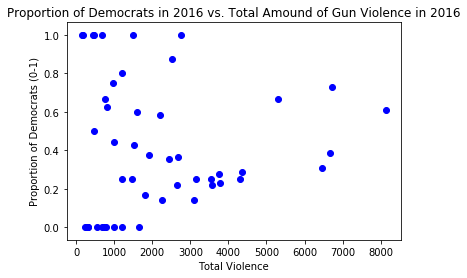

In [281]:
x = df_total_violence[2016].tolist()
y = df_percent_dem[2016].tolist()
plt.scatter(x, y, label="2016", color="blue")
plt.title('Proportion of Democrats in 2016 vs. Total Amound of Gun Violence in 2016') 
plt.xlabel('Total Violence') 
plt.ylabel('Proportion of Democrats (0-1)') 

### Democrats in 2018

Text(0, 0.5, 'Proportion of Democrats (0-1)')

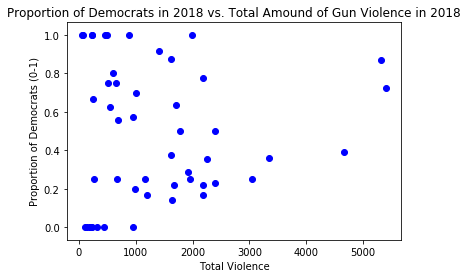

In [282]:
x = df_total_violence[2018].tolist()
y = df_percent_dem[2018].tolist()
plt.scatter(x, y, label="2018", color="blue")
plt.title('Proportion of Democrats in 2018 vs. Total Amound of Gun Violence in 2018') 
plt.xlabel('Total Violence') 
plt.ylabel('Proportion of Democrats (0-1)') 

## Key Swing States
This will allow us to see if gun violence does have an impact on these key states. This is so because they are not considered "solid" Democrat or Republican, which would give us a gauge of how important gun violence is to them. Key states are a better representation of our country because they are the only ones that sway between party from year to year.

In [283]:
# Gathering all the swing states together.
swing_states = ['Colorado', 'Florida', 'Iowa', 'Michigan', 'Minnesota', 'Ohio', 'Nevada', 'New Hampshire', 'North Carolina', 'Pennsylvania', 'Virginia', 'Wisconsin']
df_total_violence_swing = df_total_violence.loc[swing_states]
df_percent_rep_swing = df_percent_rep.loc[swing_states]
df_percent_dem_swing = df_percent_dem.loc[swing_states]

Text(0, 0.5, 'Proportion of Democrats (0-1)')

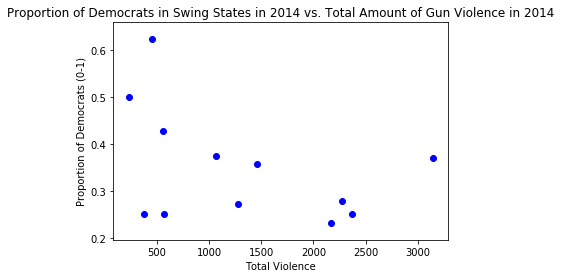

In [284]:
x = df_total_violence_swing[2014].tolist()
y = df_percent_dem_swing[2014].tolist()
plt.scatter(x, y, label="2014", color="blue")
plt.title('Proportion of Democrats in Swing States in 2014 vs. Total Amount of Gun Violence in 2014') 
plt.xlabel('Total Violence') 
plt.ylabel('Proportion of Democrats (0-1)') 

Text(0, 0.5, 'Proportion of Democrats (0-1)')

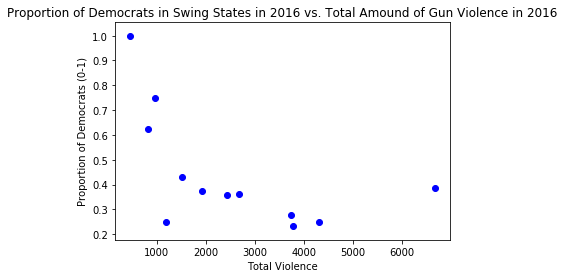

In [285]:
x = df_total_violence_swing[2016].tolist()
y = df_percent_dem_swing[2016].tolist()
plt.scatter(x, y, label="2016", color="blue")
plt.title('Proportion of Democrats in Swing States in 2016 vs. Total Amound of Gun Violence in 2016') 
plt.xlabel('Total Violence') 
plt.ylabel('Proportion of Democrats (0-1)') 

Text(0, 0.5, 'Proportion of Democrats (0-1)')

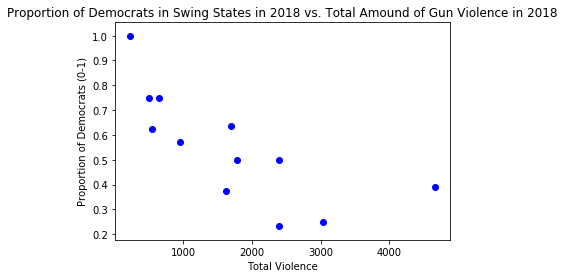

In [286]:
x = df_total_violence_swing[2018].tolist()
y = df_percent_dem_swing[2018].tolist()
plt.scatter(x, y, label="2018", color="blue")
plt.title('Proportion of Democrats in Swing States in 2018 vs. Total Amound of Gun Violence in 2018') 
plt.xlabel('Total Violence') 
plt.ylabel('Proportion of Democrats (0-1)') 

# Running Statistical Analysis

We will begin running analysis on the graph that has all the states in the graph to see the general direction of each year.

## Linear Regression

In [287]:
#imports to perform our linear regression and statistics
from  matplotlib import pyplot
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [288]:
#function to run linear regression on our tables
def regression(year):
    x_values=df_total_violence[year].values[:,np.newaxis]
    y_values=df_percent_dem[year].values[:,np.newaxis]

    violence_reg = linear_model.LinearRegression()
    violence_reg.fit(x_values, y_values)
    prediction=violence_reg.predict(np.sort(x_values, axis=0))

    pyplot.scatter(x_values, y_values)
    pyplot.plot(np.sort(x_values, axis=0),prediction,color = 'blue')
    return pyplot.show()
def statistics(year):
    x = df_total_violence[year].values[:,np.newaxis]
    y = df_percent_dem[year].values[:,np.newaxis]
    x, y = np.array(x), np.array(y)
    x = sm.add_constant(x)
    model = sm.OLS(y, x)
    results = model.fit()
    return results.summary()

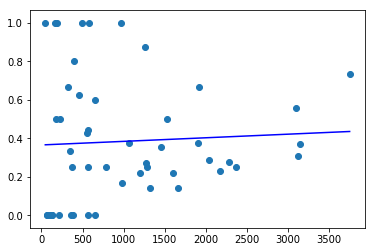

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.1417
Date:                Thu, 16 May 2019   Prob (F-statistic):              0.708
Time:                        23:00:30   Log-Likelihood:                -14.042
No. Observations:                  50   AIC:                             32.08
Df Residuals:                      48   BIC:                             35.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3655      0.069      5.326      0.000       0.228       0.503
x1          1.867e-05   4.96e-05      0.376      0.708   -8.11e-05       0.000
==============================================================================
Omnibus:                        5.076   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.079   Jarque-Bera (JB):                4.764
Skew:                           0.695   Prob(JB):                       0.0924
Kurtosis:                       2.403   Cond. No.                     2.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [289]:
#running linear regression for 2014
regression(2014)
statistics(2014)

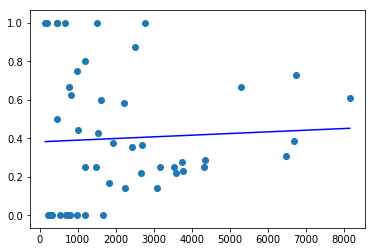

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.1144
Date:                Thu, 16 May 2019   Prob (F-statistic):              0.737
Time:                        23:00:31   Log-Likelihood:                -17.091
No. Observations:                  50   AIC:                             38.18
Df Residuals:                      48   BIC:                             42.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3817      0.073      5.198      0.000       0.234       0.529
x1          8.658e-06   2.56e-05      0.338      0.737   -4.28e-05    6.01e-05
==============================================================================
Omnibus:                        7.239   Durbin-Watson:                   1.784
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                4.518
Skew:                           0.564   Prob(JB):                        0.104
Kurtosis:                       2.054   Cond. No.                     4.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [290]:
#running linear regression for 2016
regression(2016)
statistics(2016)

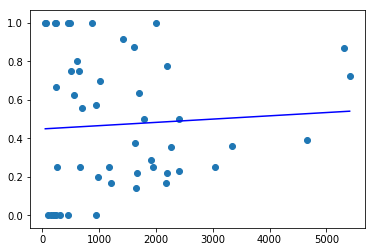

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.1823
Date:                Thu, 16 May 2019   Prob (F-statistic):              0.671
Time:                        23:00:31   Log-Likelihood:                -18.679
No. Observations:                  50   AIC:                             41.36
Df Residuals:                      48   BIC:                             45.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4487      0.074      6.067      0.000       0.300       0.597
x1          1.704e-05   3.99e-05      0.427      0.671   -6.32e-05    9.73e-05
==============================================================================
Omnibus:                       22.476   Durbin-Watson:                   1.512
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                4.311
Skew:                           0.244   Prob(JB):                        0.116
Kurtosis:                       1.647   Cond. No.                     2.70e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [291]:
#running linear regression for 2018
regression(2018)
statistics(2018)

### Linear Regression on Swing States

In [292]:
#linearizing the data set for swing states
df_percent_dem_swing = np.log10(df_percent_dem_swing)

In [294]:
def swing_states(year):
    x_values=df_total_violence_swing[year].values[:,np.newaxis]
    y_values=df_percent_dem_swing[year].values[:,np.newaxis]

    violence_reg = linear_model.LinearRegression()
    violence_reg.fit(x_values, y_values)
    prediction=violence_reg.predict(np.sort(x_values, axis=0))

    pyplot.scatter(x_values, y_values)
    pyplot.plot(np.sort(x_values, axis=0),prediction,color = 'blue')
    return pyplot.show()
def statistics(year):
    x = df_total_violence_swing[year].values[:,np.newaxis]
    y = df_percent_dem_swing[year].values[:,np.newaxis]
    x, y = np.array(x), np.array(y)
    x = sm.add_constant(x)
    model = sm.OLS(y, x)
    results = model.fit()
    return results.summary()

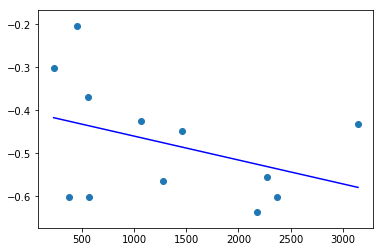

C:\Users\Victor Chi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     1.768
Date:                Thu, 16 May 2019   Prob (F-statistic):              0.213
Time:                        23:01:42   Log-Likelihood:                 8.2449
No. Observations:                  12   AIC:                            -12.49
Df Residuals:                      10   BIC:                            -11.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4045      0.068     -5.981      0.000      -0.555      -0.254
x1         -5.565e-05   4.18e-05     -1.330      0.213      -0.000    3.76e-05
==============================================================================
Omnibus:                        0.616   Durbin-Watson:                   2.499
Prob(Omnibus):                  0.735   Jarque-Bera (JB):                0.585
Skew:                           0.196   Prob(JB):                        0.746
Kurtosis:                       1.991   Cond. No.                     2.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [295]:
swing_states(2014)
statistics(2014)

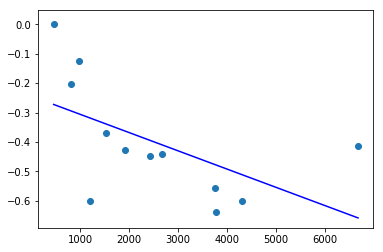

C:\Users\Victor Chi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     4.618
Date:                Thu, 16 May 2019   Prob (F-statistic):             0.0572
Time:                        23:01:55   Log-Likelihood:                 5.0606
No. Observations:                  12   AIC:                            -6.121
Df Residuals:                      10   BIC:                            -5.151
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2439      0.089     -2.741      0.021      -0.442      -0.046
x1          -6.21e-05   2.89e-05     -2.149      0.057      -0.000    2.29e-06
==============================================================================
Omnibus:                        0.279   Durbin-Watson:                   2.434
Prob(Omnibus):                  0.870   Jarque-Bera (JB):                0.400
Skew:                           0.265   Prob(JB):                        0.819
Kurtosis:                       2.278   Cond. No.                     5.46e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [296]:
swing_states(2016)
statistics(2016)

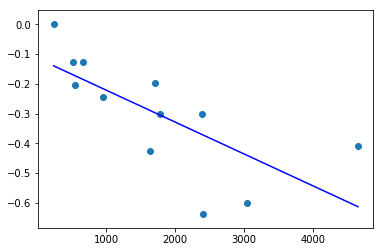

C:\Users\Victor Chi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     10.38
Date:                Thu, 16 May 2019   Prob (F-statistic):            0.00915
Time:                        23:02:05   Log-Likelihood:                 7.5541
No. Observations:                  12   AIC:                            -11.11
Df Residuals:                      10   BIC:                            -10.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1144      0.070     -1.637      0.133      -0.270       0.041
x1            -0.0001   3.32e-05     -3.221      0.009      -0.000    -3.3e-05
==============================================================================
Omnibus:                        0.866   Durbin-Watson:                   2.419
Prob(Omnibus):                  0.649   Jarque-Bera (JB):                0.600
Skew:                          -0.490   Prob(JB):                        0.741
Kurtosis:                       2.510   Cond. No.                     3.61e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [297]:
swing_states(2018)
statistics(2018)

### Final Table Results

## Ethics and Privacy

Since we used two data sets from two different websites, we can take a look at each one individually and discuss concerns and how they were handled.

The first data set was regarding gun violence from Kaggle. Kaggle is a great source for publicly available data sets without any restrictions. This data set listed all gun violence incidents throughout the US over several years, with extensive details regarding the incident. The list itself does contain concerning data, such as extensive details on the gun violence event such as city, ages of those involved and exact latitude and longitude. Also, it contains links to articles on each gun incident which could lead to an article posting the names of either the criminals or victims. Since all of this information is outside the scope of our project and there are other more vague, columns that satisfy our needs, we chose to drop all columns except those that were broad and assisted in our analysis. This data came from [the Gun Violence Archive](http://www.gunviolencearchive.org/), whos main goal is to spread data regarding gun violence without taking a side. While the data itself my not seem bias, it is concerning that the website also has a "Analysis & Opinion" section, which obviously displays bias within the organization itself. Fortunately, with such a vast data set we believe that the data itself is sufficient for analysis.

The second data set was extremely difficult to obtain through the [website](http://library.cqpress.com/elections/index.php) we used. The CQ Voting website had an institution lock and user download restrictions that made it difficult to obtain and utilize the data. CQ does allow users to view and download the data for their personal analysis, but they make it challenging to do so. The data itself was fairly clean, but included the full names of political candidates running in the election. Since their names are unrelated to our data analysis, we removed all columns except year, state and plurality party. Just from looking through the CQ website, we were unable to find any bias of concern in the data.

## Conclusion

Evan will write

1. more negative values mean more democrats.
2. p value over .05 means no signifance and accept the null hypothesis
3. talk about how coefficeint means moving each step by that value means that we see no effect happening.

# # References

https://www.washingtonpost.com/news/wonk/wp/2018/05/31/the-surprising-way-gun-violence-is-dividing-america/?noredirect=on&utm_term=.583b6e1bf7f8

https://www.gunviolencearchive.org/reports/mass-shooting